In [1]:
import torch
import torch.nn as nn
import torchvision

In [2]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_data = torchvision.datasets.CIFAR10(root='CIFAR_data/',
                                          train=True,
                                          download=True,
                                          transform=transform)
test_data = torchvision.datasets.CIFAR10(root='CIFAR_data/',
                                         train=False,
                                         download=True,
                                         transform=transform)

100%|███████████████████████████████████████████████████████████████▉| 170483712/170498071 [12:02<00:00, 527418.27it/s]

Files already downloaded and verified


170500096it [12:20, 527418.27it/s]                                                                                     

In [3]:
def DataLoader(dataset,batch_size):
    data = torch.utils.data.DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)
    return data

In [38]:
train_loader = DataLoader(train_data,4)
test_loader = DataLoader(test_data,10)

In [13]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [14]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        #input channels = 3,output channels = 6
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2,stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2,stride=2))
         #Fully Connected Layer Next with 5x5x16 inputs to 120 outputs
        self.fc1 = nn.Linear(in_features=5*5*16,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        x=self.fc2(x)
        out = self.fc3(x)
        return out
        

In [28]:
# hyper parameters
learning_rate = 0.001
batch_size = 4
training_epochs = 5
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate,momentum=0.9)

In [29]:
import time
# traing the model
training_time = time.time()

for epoch in range(training_epochs):
    print("Training of epoch {} started".format(epoch+1))
    avg_cost = 0
    total_batch = len(train_data)//batch_size # or len(train_loader)
    start_time = time.time()
    for i,(inputs,labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        pred = model(inputs)
        loss = criterion(pred,labels)
        loss.backward()
        optimizer.step()
        
        avg_cost+=loss.data / batch_size
    print("[Epoch: {:<4}] cost = {:_<4.3} took {}s".format(epoch + 1, avg_cost.item(),time.time()-start_time))

print('Learning Finished! in {}s'.format(time.time()-training_time))
    

Training of epoch 1 started
[Epoch: 1   ] cost = 5.09e+03 took 50.23107147216797s
Training of epoch 2 started
[Epoch: 2   ] cost = 4.19e+03 took 51.304319620132446s
Training of epoch 3 started
[Epoch: 3   ] cost = 3.91e+03 took 54.80519413948059s
Training of epoch 4 started
[Epoch: 4   ] cost = 3.75e+03 took 51.58801341056824s
Training of epoch 5 started
[Epoch: 5   ] cost = 3.66e+03 took 55.616767168045044s
Learning Finished! in 263.56031918525696s


In [30]:
loss.data

tensor(2.1862)

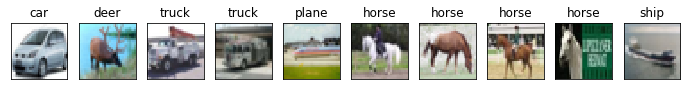

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)
dataiter = iter(test_loader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [44]:
images.size()

torch.Size([10, 3, 32, 32])

In [45]:
pred = model(images)
# If we prefer to get a probability score, we can use the nn.Softmax function on the raw output
softmax = nn.Softmax(dim=1)
sm = softmax(pred)
print(sm)

tensor([[6.6248e-04, 9.9192e-01, 2.8799e-05, 1.5066e-05, 1.9222e-04, 1.0382e-05,
         2.7299e-06, 6.4094e-05, 2.9167e-04, 6.8144e-03],
        [1.5853e-02, 2.3602e-03, 5.1442e-02, 6.4138e-02, 5.0346e-01, 9.2514e-02,
         1.1843e-03, 2.5772e-01, 5.7951e-03, 5.5299e-03],
        [6.2679e-03, 6.7266e-01, 1.3213e-04, 2.0533e-03, 1.0410e-04, 3.8951e-04,
         2.1841e-04, 3.9722e-04, 1.1303e-01, 2.0475e-01],
        [1.0609e-02, 6.2827e-01, 4.6459e-04, 1.0641e-02, 2.9008e-03, 1.3158e-02,
         3.3531e-03, 3.2822e-03, 6.9109e-02, 2.5821e-01],
        [2.4244e-01, 1.2867e-02, 4.7999e-02, 7.3351e-03, 1.9720e-01, 2.0179e-03,
         4.0528e-04, 7.5803e-02, 4.0718e-01, 6.7538e-03],
        [4.0048e-04, 1.5301e-05, 1.2945e-02, 7.1035e-03, 3.9330e-03, 2.6859e-02,
         1.0740e-04, 9.4815e-01, 2.0245e-04, 2.8668e-04],
        [4.0540e-04, 5.9074e-04, 4.0843e-04, 2.7264e-04, 1.0266e-01, 8.4364e-04,
         1.6804e-05, 8.9472e-01, 2.4763e-07, 8.3953e-05],
        [1.6370e-04, 1.5107

In [46]:
probs, index = torch.max(sm, dim=1)

for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

car - 0.9919
deer - 0.5035
car - 0.6727
car - 0.6283
ship - 0.4072
horse - 0.9481
horse - 0.8947
horse - 0.8994
cat - 0.3056
ship - 0.9347


In [ ]:
# Our model predicted correct for 6 out of 10 images
# https://www.stefanfiott.com/machine-learning/cifar-10-classifier-using-cnn-in-pytorch/